In [311]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from scipy import stats
import warnings

from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

In [275]:
df = pd.read_csv("Fish.csv")
df.sort_values("Species",ascending=False,inplace=True)
df.reset_index(drop=True,inplace=True)
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Whitefish,306.0,25.6,28.0,30.8,8.7780,4.6816
1,Whitefish,270.0,23.6,26.0,28.7,8.3804,4.2476
2,Whitefish,270.0,24.1,26.5,29.3,8.1454,4.2485
3,Whitefish,540.0,28.5,31.0,34.0,10.7440,6.5620
4,Whitefish,800.0,33.7,36.4,39.6,11.7612,6.5736
...,...,...,...,...,...,...,...
154,Bream,700.0,31.9,35.0,40.5,16.2405,5.5890
155,Bream,680.0,31.8,35.0,40.6,15.4686,6.1306
156,Bream,620.0,31.5,34.5,39.7,15.5227,5.2801
157,Bream,685.0,31.4,34.0,39.2,15.9936,5.3704


In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [277]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [278]:
df.describe(include=['O'])

,Species
count,159
unique,7
top,Perch
freq,56


In [279]:
weight_by_species = df[["Weight","Species"]].groupby(by="Species", as_index=False).mean().sort_values("Weight", ascending=False)
weight_by_species

,Species,Weight
3,Pike,718.705882
0,Bream,617.828571
6,Whitefish,531.000000
2,Perch,382.239286
1,Parkki,154.818182
4,Roach,152.050000
5,Smelt,11.178571


In [280]:
by_species = df.drop("Weight", axis=1).groupby(by="Species", as_index=False).mean().sort_values("Length1", ascending=False)
by_species

,Species,Length1,Length2,Length3,Height,Width
3,Pike,42.476471,45.482353,48.717647,7.713771,5.086382
0,Bream,30.305714,33.108571,38.354286,15.183211,5.427614
6,Whitefish,28.800000,31.316667,34.316667,10.027167,5.473050
2,Perch,25.735714,27.892857,29.571429,7.861870,4.745723
4,Roach,20.645000,22.275000,24.970000,6.694795,3.657850
1,Parkki,18.727273,20.345455,22.790909,8.962427,3.220736
5,Smelt,11.257143,11.921429,13.035714,2.209371,1.340093


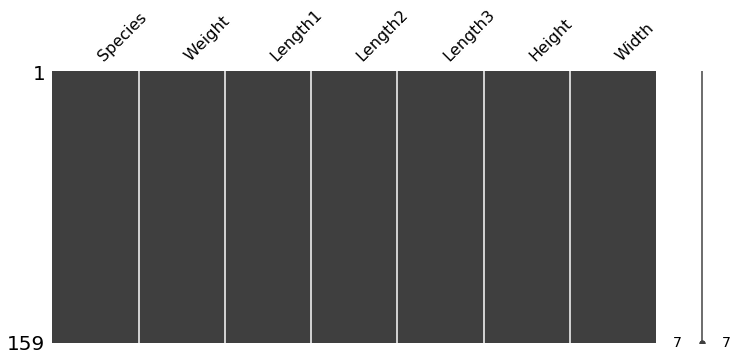

In [281]:
msno.matrix(df, figsize=(12,5))

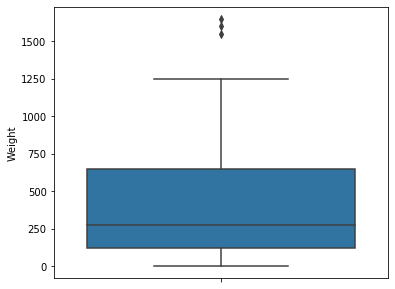

In [282]:
fig, axs = plt.subplots()
fig.set_size_inches(6,5)
sns.boxplot(data=df, y="Weight")
plt.show()

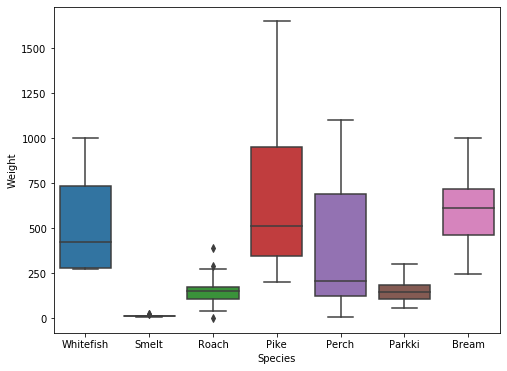

In [283]:
fig, ax = plt.subplots()
fig.set_size_inches(8,6)
sns.boxplot(data=df, x="Species", y="Weight")
plt.show()

In [284]:
outliers = np.abs(df["Weight"]-df["Weight"].mean())<=(3*df["Weight"].std())
outliers.value_counts()

True     156
False      3
Name: Weight, dtype: int64

In [285]:
df_wout_outliers = df[outliers]
print("Shape of before outliers: {}".format(df.shape))
print("Shape of after outliers: {}".format(df_wout_outliers.shape))

Shape of before outliers: (159, 7)
Shape of after outliers: (156, 7)


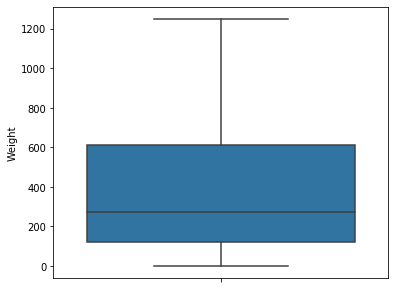

In [286]:
fig, axs = plt.subplots()
fig.set_size_inches(6,5)
sns.boxplot(data=df_wout_outliers, y="Weight")
plt.show()

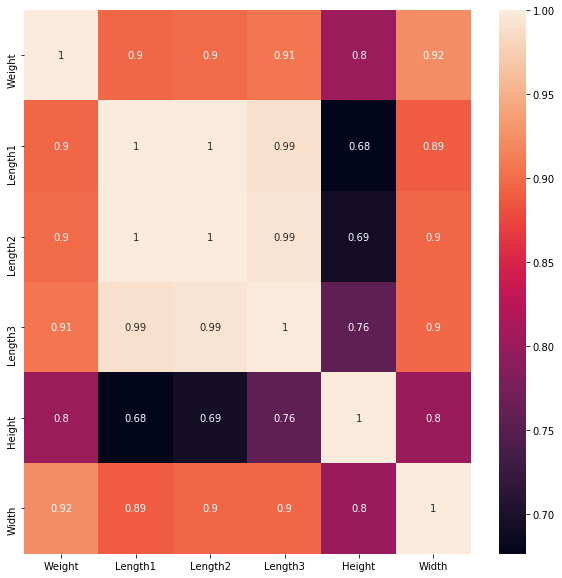

In [287]:
corrMat = df_wout_outliers[df_wout_outliers.drop("Species",axis=1).columns].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrMat, annot=True)
plt.show()

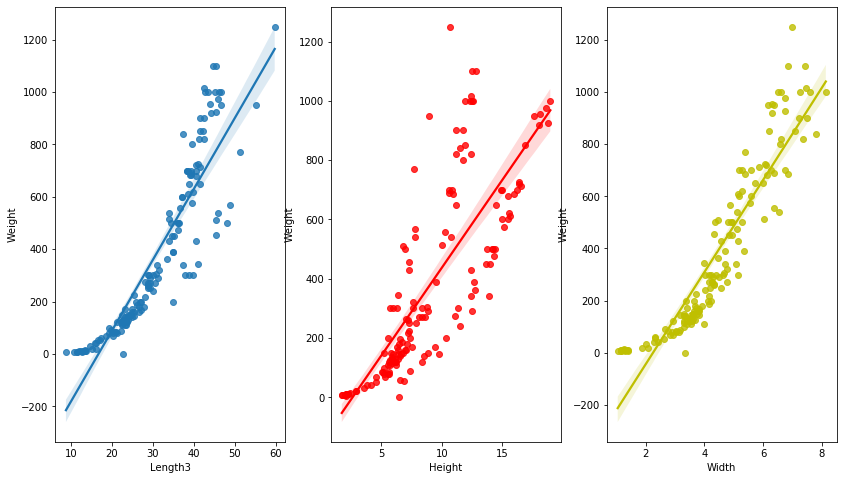

In [288]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.set_size_inches(14,8)
sns.regplot(x="Length3", y="Weight", data = df_wout_outliers, ax=ax1)
sns.regplot(x="Height", y="Weight", data = df_wout_outliers, ax=ax2, color='r')
sns.regplot(x="Width", y="Weight", data = df_wout_outliers, ax=ax3, color='y')

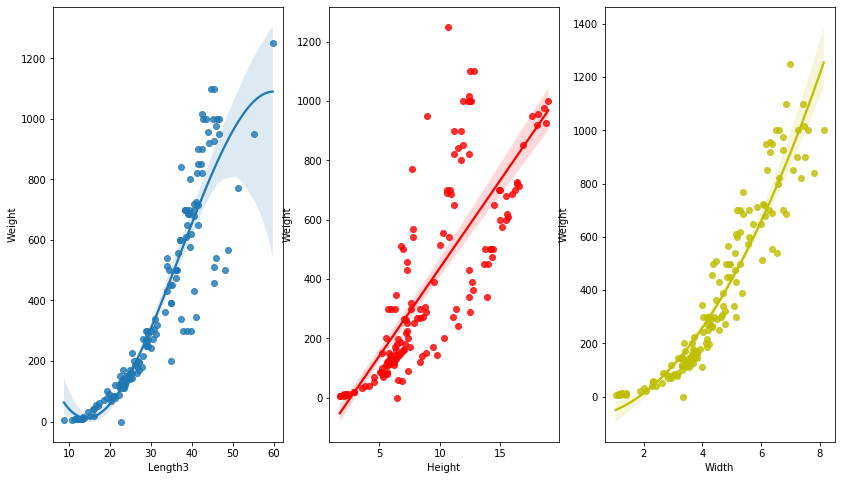

In [289]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.set_size_inches(14,8)
sns.regplot(x="Length3", y="Weight", data = df_wout_outliers, ax=ax1,order=3)
sns.regplot(x="Height", y="Weight", data = df_wout_outliers, ax=ax2, color='r')
sns.regplot(x="Width", y="Weight", data = df_wout_outliers, ax=ax3, color='y',order=2)

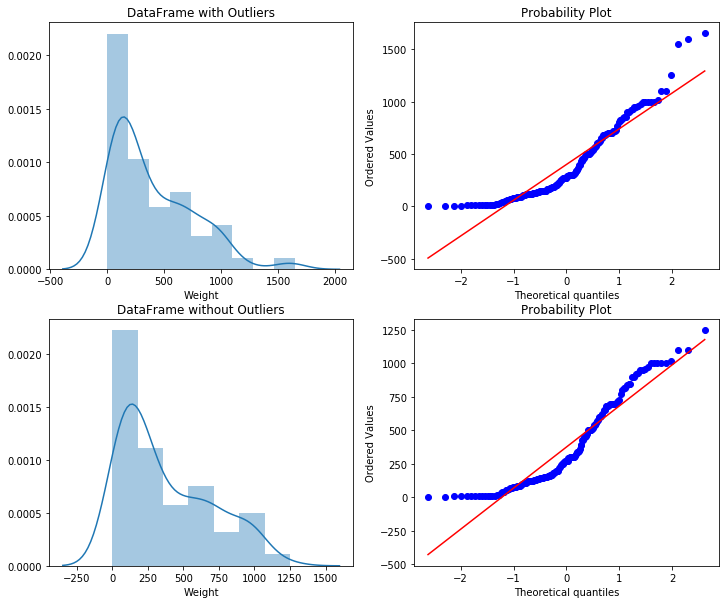

In [290]:
fig, axes = plt.subplots(2,2)
fig.set_size_inches(12,10)

sns.distplot(df["Weight"], ax= axes[0][0])
stats.probplot(df["Weight"], dist="norm", fit=True, plot=axes[0][1])
axes[0][0].set(title="DataFrame with Outliers")

sns.distplot(df_wout_outliers["Weight"], ax= axes[1][0])
stats.probplot(df_wout_outliers["Weight"], dist="norm", fit=True, plot=axes[1][1])
axes[1][0].set(title="DataFrame without Outliers")

plt.show()

In [332]:
df_wout_outliers

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Whitefish,306.0,25.6,28.0,30.8,8.7780,4.6816
1,Whitefish,270.0,23.6,26.0,28.7,8.3804,4.2476
2,Whitefish,270.0,24.1,26.5,29.3,8.1454,4.2485
3,Whitefish,540.0,28.5,31.0,34.0,10.7440,6.5620
4,Whitefish,800.0,33.7,36.4,39.6,11.7612,6.5736
...,...,...,...,...,...,...,...
154,Bream,700.0,31.9,35.0,40.5,16.2405,5.5890
155,Bream,680.0,31.8,35.0,40.6,15.4686,6.1306
156,Bream,620.0,31.5,34.5,39.7,15.5227,5.2801
157,Bream,685.0,31.4,34.0,39.2,15.9936,5.3704


In [333]:
df_shuffled = shuffle(df_wout_outliers)
df_shuffled

,Species,Weight,Length1,Length2,Length3,Height,Width
35,Roach,78.0,17.5,18.8,21.2,5.5756,2.9044
74,Perch,900.0,37.0,40.0,42.5,11.7300,7.2250
6,Smelt,9.7,10.4,11.0,12.0,2.1960,1.3800
98,Perch,51.5,15.0,16.2,17.2,4.5924,2.6316
49,Pike,510.0,40.0,42.5,45.5,6.8250,4.4590
...,...,...,...,...,...,...,...
62,Perch,250.0,25.4,27.5,28.9,7.2828,4.5662
51,Pike,345.0,36.0,38.5,41.0,6.3960,3.9770
63,Perch,265.0,25.4,27.5,28.9,7.0516,4.3350
89,Perch,690.0,34.6,37.0,39.3,10.5717,6.3666


In [334]:
categ = df_shuffled["Species"]
df_dummy = pd.get_dummies(categ, drop_first=True)
df_dummy.reset_index(drop=True,inplace=True)
df_dummy

,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,0,0,0,1,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
151,0,1,0,0,0,0
152,0,0,1,0,0,0
153,0,1,0,0,0,0
154,0,1,0,0,0,0


In [335]:
y = df_shuffled["Weight"]
y.reset_index(drop=True, inplace=True)
y

0       78.0
1      900.0
2        9.7
3       51.5
4      510.0
       ...  
151    250.0
152    345.0
153    265.0
154    690.0
155    700.0
Name: Weight, Length: 156, dtype: float64

In [336]:
numerical = df_shuffled.drop(["Species","Weight"], axis=1)
scaler = StandardScaler()
num_norm = scaler.fit_transform(numerical)
num_norm
df_num = pd.DataFrame(num_norm,columns=numerical.columns)
df_num

,Length1,Length2,Length3,Height,Width
0,-0.897189,-0.920637,-0.879011,-0.783105,-0.882711
1,1.247942,1.251224,1.118921,0.644684,1.709412
2,-1.678237,-1.719718,-1.741967,-1.567154,-1.797267
3,-1.172206,-1.186998,-1.254209,-1.011202,-1.046376
4,1.577962,1.507339,1.400320,-0.493251,0.049964
...,...,...,...,...,...
151,-0.028136,-0.029355,-0.156754,-0.387043,0.114278
152,1.137935,1.097554,0.978222,-0.592776,-0.239210
153,-0.028136,-0.029355,-0.156754,-0.440681,-0.024429
154,0.983926,0.943885,0.818762,0.375964,1.194419


In [337]:
df_num.describe()

,Length1,Length2,Length3,Height,Width
count,156.000000,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02
mean,0.000000,2.277381e-16,-1.821904e-16,7.970832e-17,1.366428e-16
std,1.003221,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00
min,-1.997257,-1.986079e+00,-2.042126e+00,-1.675635e+00,-1.996688e+00
25%,-0.732179,-6.952556e-01,-7.078263e-01,-7.004973e-01,-6.036162e-01
50%,-0.072139,-1.061895e-01,-1.239237e-01,-3.023653e-01,-7.944425e-02
75%,0.711659,7.389923e-01,8.304874e-01,7.951438e-01,6.291357e-01
max,2.898043,2.890364e+00,2.732275e+00,2.321310e+00,2.259561e+00


In [347]:
merged_df = pd.concat([df_num,df_dummy,y],axis=1)
merged_df

,Length1,Length2,Length3,Height,Width,Parkki,Perch,Pike,Roach,Smelt,Whitefish,Weight
0,-0.897189,-0.920637,-0.879011,-0.783105,-0.882711,0,0,0,1,0,0,78.0
1,1.247942,1.251224,1.118921,0.644684,1.709412,0,1,0,0,0,0,900.0
2,-1.678237,-1.719718,-1.741967,-1.567154,-1.797267,0,0,0,0,1,0,9.7
3,-1.172206,-1.186998,-1.254209,-1.011202,-1.046376,0,1,0,0,0,0,51.5
4,1.577962,1.507339,1.400320,-0.493251,0.049964,0,0,1,0,0,0,510.0
...,...,...,...,...,...,...,...,...,...,...,...,...
151,-0.028136,-0.029355,-0.156754,-0.387043,0.114278,0,1,0,0,0,0,250.0
152,1.137935,1.097554,0.978222,-0.592776,-0.239210,0,0,1,0,0,0,345.0
153,-0.028136,-0.029355,-0.156754,-0.440681,-0.024429,0,1,0,0,0,0,265.0
154,0.983926,0.943885,0.818762,0.375964,1.194419,0,1,0,0,0,0,690.0


In [354]:
from sklearn.model_selection import train_test_split

X = merged_df.drop("Weight", axis=1).values
y = merged_df["Weight"].values
y

array([  78. ,  900. ,    9.7,   51.5,  510. ,  300. ,    9.8,  500. ,
        300. ,   19.7,  770. ,    7.5,  135. ,  130. ,  700. ,  110. ,
         60. ,   70. ,  820. , 1000. ,   10. ,  290. ,  200. ,  260. ,
        456. ,  514. ,  170. ,    6.7,    9.8,  567. ,  160. ,   13.4,
        272. ,  140. ,  180. ,  556. ,   90. ,  115. ,  390. ,  500. ,
         12.2,  714. ,  145. ,    9.9,  500. ,   78. ,   87. ,    0. ,
          7. ,  145. , 1000. ,   40. ,  300. ,  725. ,  450. ,   85. ,
         69. ,  161. ,  975. ,  850. ,  700. ,  300. ,  200. ,    5.9,
        130. ,  500. ,  720. ,  363. ,  150. ,  920. ,  120. ,  145. ,
        955. ,  145. , 1000. ,  700. ,  575. ,  120. ,  188. ,  600. ,
        540. ,  242. ,  300. ,  150. ,   19.9,  850. ,  273. ,  340. ,
        430. , 1100. ,  306. ,  200. ,  620. ,  680. ,  160. ,  450. ,
        390. ,  950. ,   12.2,  150. ,  610. ,  270. ,   80. ,  475. ,
       1000. ,  925. ,  197. ,  225. ,   40. ,    8.7,  430. ,  685. ,
      

In [349]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [369]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

lnreg = LinearRegression()
lnreg.fit(X_train,y_train)
y_pred_lnreg = lnreg.predict(X_test)

mse_lnreg = mean_squared_error(y_test,y_pred_lnreg)
rmse_lnreg = np.sqrt(mean_squared_error(y_test,y_pred_lnreg))
r2_lnreg = lnreg.score(X_test, y_test)

print("R^2: {}".format(r2_lnreg))
print("Root Mean Squred Error: {}".format(rmse_lnreg))

R^2: 0.9367520793994757
Root Mean Squred Error: 89.99890664657214


In [370]:
rdg = Ridge()
rdg.fit(X_train, y_train)
y_pred_rdg = rdg.predict(X_test)

mse_rdg = mean_squared_error(y_test,y_pred_rdg)
rmse_rdg = np.sqrt(mean_squared_error(y_test,y_pred_rdg))
r2_rdg = rdg.score(X_test, y_test)

print("R^2: {}".format(r2_rdg))
print("Root Mean Squred Error: {}".format(rmse_rdg))

R^2: 0.9431216990760177
Root Mean Squred Error: 85.34683391144917


In [371]:
lss = Lasso()
lss.fit(X_train, y_train)
y_pred_lss = lss.predict(X_test)

mse_lss = mean_squared_error(y_test,y_pred_lss)
rmse_lss = np.sqrt(mean_squared_error(y_test,y_pred_lss))
r2_lss = lss.score(X_test, y_test)

print("R^2: {}".format(r2_lss))
print("Root Mean Squred Error: {}".format(rmse_lss))

R^2: 0.9429640229985341
Root Mean Squred Error: 85.4650498243524


In [375]:
from sklearn.ensemble import RandomForestRegressor

rfModel = RandomForestRegressor(n_estimators=100)
rfModel.fit(X_train, y_train)
y_pred_rfModel = rfModel.predict(X_test)

mse_rfModel = mean_squared_error(y_test,y_pred_rfModel)
rmse_rfModel = np.sqrt(mean_squared_error(y_test,y_pred_rfModel))
r2_rfModel = rfModel.score(X_test, y_test)

print("R^2: {}".format(r2_rfModel))
print("Root Mean Squred Error: {}".format(rmse_rfModel))

R^2: 0.9550992290617026
Root Mean Squred Error: 75.82999135071822


In [376]:
from sklearn.ensemble import GradientBoostingRegressor

gdr = GradientBoostingRegressor(n_estimators=100)
gdr.fit(X_train, y_train)
y_pred_gdr = gdr.predict(X_test)

mse_gdr = mean_squared_error(y_test,y_pred_gdr)
rmse_gdr = np.sqrt(mean_squared_error(y_test,y_pred_gdr))
r2_gdr = gdr.score(X_test, y_test)

print("R^2: {}".format(r2_gdr))
print("Root Mean Squred Error: {}".format(rmse_gdr))

R^2: 0.9541714439875577
Root Mean Squred Error: 76.60942351485353


In [381]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=2)
ada = AdaBoostRegressor(dt, random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)


mse_ada = mean_squared_error(y_test,y_pred_ada)
rmse_ada = np.sqrt(mean_squared_error(y_test,y_pred_ada))
r2_ada = ada.score(X_test, y_test)

print("R^2: {}".format(r2_ada))
print("Root Mean Squred Error: {}".format(rmse_ada))

R^2: 0.9566788038695996
Root Mean Squred Error: 74.48422909085042
